In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
# EDA: Online Retail Dataset

# Load data
data_path = "../data/online_retail.csv"  # adjust path if needed
df = pd.read_csv(data_path)

In [17]:
# Basic overview
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include='all'))

Shape of the dataset: (541909, 8)

Column names: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Summary statistics:
        InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN  

In [18]:
# Basic overview
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include='all'))

Shape of the dataset: (541909, 8)

Column names: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Summary statistics:
        InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN  

In [19]:
# Drop rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

In [20]:
# Convert InvoiceDate to datetime
# df_clean['InvoiceDate'].head()
df_clean['InvoiceDate'].dtype
# df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

dtype('O')

In [34]:

# Add 'TotalPrice' column
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

#df_clean.loc[:, 'TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Top 10 countries by number of transactions
top_countries = df_clean['Country'].value_counts().head(10)
print("\nTop 10 countries by number of transactions:\n", top_countries)

df_clean.head()


Top 10 countries by number of transactions:
 Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: count, dtype: int64


C:\Users\pietk\AppData\Local\Temp\ipykernel_3388\3223452582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
# Check for duplicates
duplicate_counts = df.apply(lambda col: col.duplicated().sum())
print("\nDuplicate counts:\n", duplicate_counts)


Duplicate counts:
 InvoiceNo      516009
StockCode      537839
Description    537685
Quantity       541187
InvoiceDate    518649
UnitPrice      540279
CustomerID     537536
Country        541871
dtype: int64


In [45]:
df_clean['TotalPrice'].describe()

count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: TotalPrice, dtype: float64

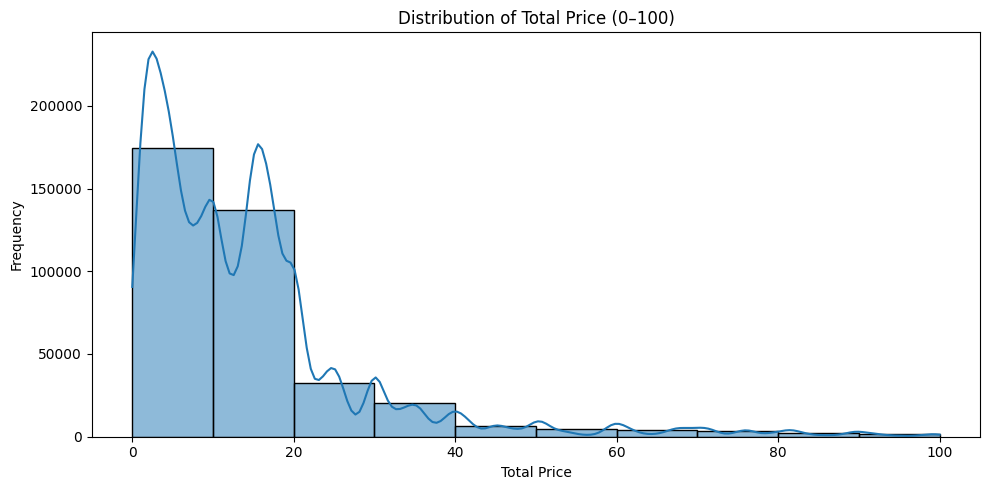

In [ ]:
# 1) Filter for TotalPrice between 0 and 100
# Note: This is a common range for many retail datasets, but adjust as needed.

sub = df_clean.loc[
    df_clean['TotalPrice'].between(0, 100, inclusive='both'),
    'TotalPrice'
]

# 2) Plot with 10 bins across 0–100
plt.figure(figsize=(10, 5))
sns.histplot(
    sub,
    bins=10,              # 10 bins → each covers a 10-unit slice
    kde=True,             # show the KDE curve, if you like
    stat='count'          # default; you could also do density
)
plt.title("Distribution of Total Price (0–100)")  
plt.xlabel("Total Price")  
plt.ylabel("Frequency")  
plt.tight_layout()

# 3) Save & show
plt.savefig("../visuals/total_price_distribution_0_100.png")
plt.show()

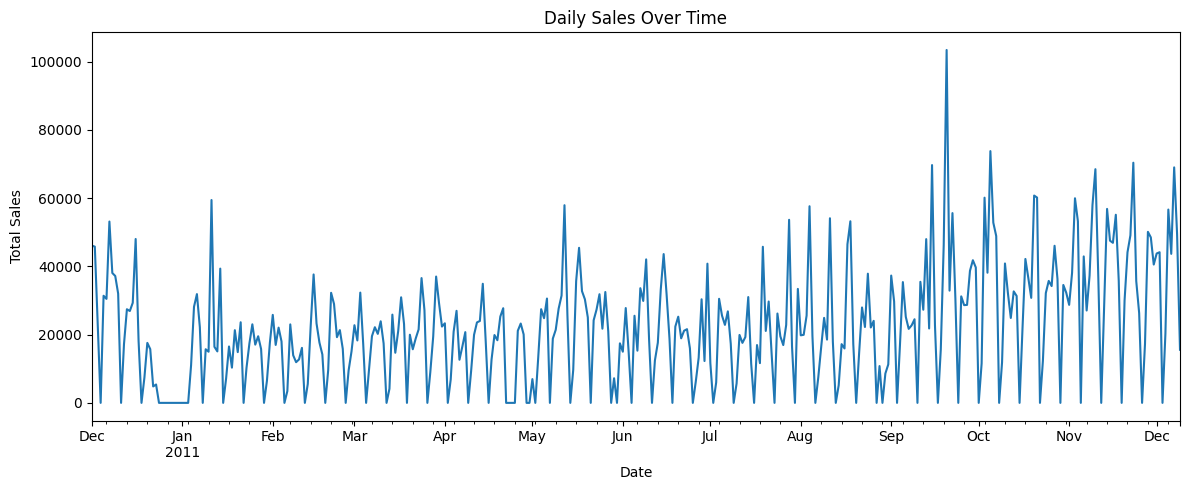

In [55]:


daily = df_clean['TotalPrice'].resample('D').sum()

plt.figure(figsize=(12, 5))
daily.plot()
plt.title("Daily Sales Over Time")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("../visuals/daily_sales.png")
plt.show()





Top 10 products:
 Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
Name: count, dtype: int64


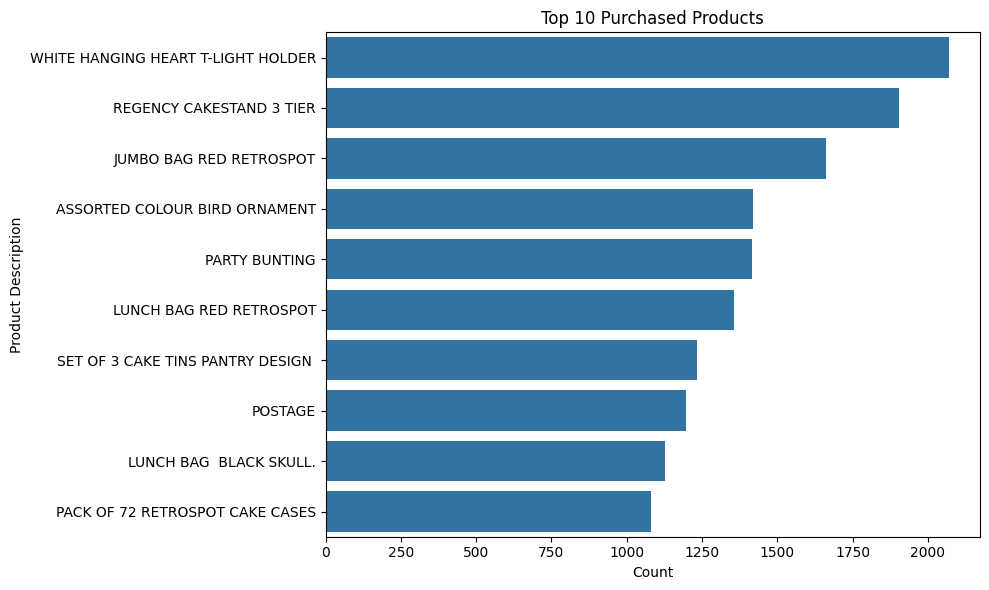


✅ EDA completed and plots saved to 'visuals' folder.


In [38]:
# Top 10 most purchased products
top_products = df_clean['Description'].value_counts().head(10)
print("\nTop 10 products:\n", top_products)

# Plot top 10 products
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Purchased Products")
plt.xlabel("Count")
plt.ylabel("Product Description")
plt.tight_layout()
plt.savefig("../visuals/top_products.png")
plt.show()

print("\n✅ EDA completed and plots saved to 'visuals' folder.")
